# **PCA Execise (Heart Disease Prediction)**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## **Preprocessing:**

In [3]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000



### **Treating Outliers:**

**Outliers can distort model performance (e.g., increase error in machine learning).**

The formula mean ± 3 * standard deviation (μ ± 3σ) is based on the 68-95-99.7 rule (also called the Empirical Rule) in statistics.

This rule states that for a normally distributed dataset:

    68% of the data falls within 1 standard deviation (μ ± 1σ).

    95% of the data falls within 2 standard deviations (μ ± 2σ).

    99.7% of the data falls within 3 standard deviations (μ ± 3σ).

By removing values beyond 3 standard deviations, we are removing only 0.3% of extreme values (outliers) while keeping 99.7% of the data intact

In [5]:
df[df.RestingBP > (df.RestingBP.mean() + 3 * df.RestingBP.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [6]:
df_1 = df[df.RestingBP <= (df.RestingBP.mean() + 3 * df.RestingBP.std())]
df_1.shape

(911, 12)

In [7]:
df[df.Cholesterol > (df.Cholesterol.mean() + 3 * df.Cholesterol.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [8]:
df_2 = df_1[df.Cholesterol <= (df.Cholesterol.mean() + 3 * df.Cholesterol.std())]
df_2.shape

(908, 12)

In [9]:
df[df.MaxHR > (df.MaxHR.mean() + 3 * df.MaxHR.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [10]:
df[df.Oldpeak > (df.Oldpeak.mean() + 3 * df.Oldpeak.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [11]:
df_3 = df_2[df.Oldpeak <= (df.Oldpeak.mean() + 3 * df.Oldpeak.std())]
df_3.shape

(902, 12)

> **We dropped 16 otliers.**



### **Handling Dummy Variables:**

In [12]:
df.Sex.unique()

array(['M', 'F'], dtype=object)

In [13]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [14]:
df.FastingBS.unique()

array([0, 1])

In [15]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [16]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [17]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [18]:
df_4 = df_3.copy()

df_4.ExerciseAngina.replace({'N':0, 'Y':1}, inplace=True)
df_4.RestingECG.replace({'Normal':1, 'ST':2, 'LVH':3}, inplace=True)
df_4.ST_Slope.replace({'Down':1, 'Flat':2, 'Up':3}, inplace=True)
df_4.Sex.replace({'M':1, 'F':0}, inplace=True)
df_4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,1,172,0,0.0,3,0
1,49,0,NAP,160,180,0,1,156,0,1.0,2,1
2,37,1,ATA,130,283,0,2,98,0,0.0,3,0
3,48,0,ASY,138,214,0,1,108,1,1.5,2,1
4,54,1,NAP,150,195,0,1,122,0,0.0,3,0


In [19]:
df_5 = pd.get_dummies(df_4, drop_first=True)
df_5.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,1,172,0,0.0,3,0,True,False,False
1,49,0,160,180,0,1,156,0,1.0,2,1,False,True,False
2,37,1,130,283,0,2,98,0,0.0,3,0,True,False,False
3,48,0,138,214,0,1,108,1,1.5,2,1,False,False,False
4,54,1,150,195,0,1,122,0,0.0,3,0,False,True,False


In [20]:
X = df_5.drop('HeartDisease', axis='columns')
y = df_5.HeartDisease

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.42896269,  0.51485643,  0.46089071, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-0.47545956, -1.94228905,  1.5925728 , ..., -0.4836591 ,
         1.86750159, -0.22914788],
       [-1.74679706,  0.51485643, -0.10495034, ...,  2.06757196,
        -0.53547478, -0.22914788],
       ...,
       [ 0.37209878,  0.51485643, -0.10495034, ..., -0.4836591 ,
        -0.53547478, -0.22914788],
       [ 0.37209878, -1.94228905, -0.10495034, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-1.64085227,  0.51485643,  0.3477225 , ..., -0.4836591 ,
         1.86750159, -0.22914788]])

### **Applying PCA:**

In [22]:
from sklearn.decomposition import PCA
pca = PCA(0.90)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 2.87105031,  0.28125436, -1.44980299, ...,  0.27551066,
        -0.05488508, -0.33358846],
       [ 0.76246058,  0.74572385,  1.41584902, ...,  0.04998644,
        -1.27896077, -0.94919092],
       [ 1.84111038, -0.05457706, -1.57769145, ..., -0.39488208,
         0.46349604, -1.2014576 ],
       ...,
       [-1.54652939, -0.55218202, -1.04182849, ..., -0.10825454,
        -0.20247092,  0.28186617],
       [ 1.87902236,  1.72875417, -0.09350489, ...,  0.38692944,
        -0.95727463, -0.90171678],
       [ 2.15069147, -0.86472944,  1.26524533, ..., -0.25449686,
        -0.52475064, -0.12388517]])

In [23]:
X_pca.shape

(902, 11)

## **Hyper Parameter Tuning to Find which Model is Better for Prediction Task:**

In [24]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [25]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=9)

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
model_params = {
    'svm':{
        'model': SVC(gamma='auto'),
        'params':{
            'C': [1, 10, 20, 30, 45, 60, 100],
            'kernel': ['rbf', 'linear']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [1, 5, 10, 20, 30, 40]
        }
    },
    'logistic_regression':{
        'model': LogisticRegression(),
        'params':{
            'C': [1, 5, 10, 20, 50]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy']
        }
    }
}

In [28]:
scores = []

for model_name, mp in model_params.items():
  clf = GridSearchCV(mp['model'], mp['params'], cv=folds, return_train_score=False)
  clf.fit(X_pca, y)
  scores.append({
      'model': model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
  })

In [29]:
import pandas as pd
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.859109,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.841430,{'n_estimators': 30}
2,logistic_regression,0.835919,{'C': 5}
3,naive_bayes_gaussian,0.832563,{}
4,decision_tree,0.760440,{'criterion': 'entropy'}


## **Choosing the Best Model for this Task:**



> **As we can see, the SVM model is has higher average score with `C=1` & `kernel='rbf'` parameters.**



In [30]:
model = SVC(C=1, kernel='rbf')
model.fit(X_pca, y)
model.score(X_pca, y)

0.9046563192904656

## Creating a Confusion Matrix:

In [31]:
y_pred = model.predict(X_pca)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
cm

array([[356,  51],
       [ 35, 460]])

Text(95.72222222222221, 0.5, 'Truth')

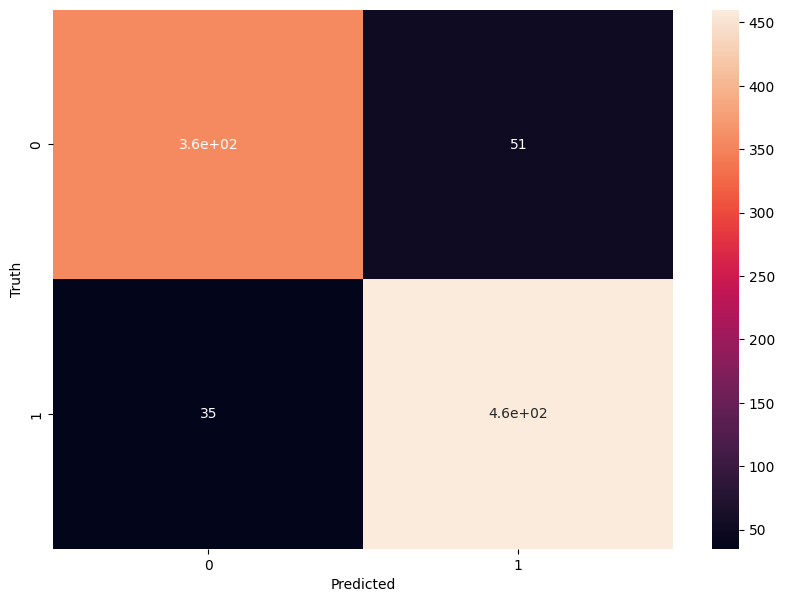

In [32]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**For a Binary Classification (0 and 1):**

- TN (True Negative): Correctly predicted negative class (0). ➡️ The top-left cell (`cm[0,0]`)

- FP (False Positive): Incorrectly predicted positive (1) instead of negative (0) (Type I error). ➡️ The top-right cell (`cm[0,1]`)

- FN (False Negative): Incorrectly predicted negative (0) instead of positive (1) (Type II error). ➡️ The bottom-left cell (`cm[1,0]`)

- TP (True Positive): Correctly predicted positive class (1). ➡️ The bottom-right cell (`cm[1,1]`)

